In [26]:
import warnings

warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)

In [2]:
import lightgbm as lgb
import shap
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

/Users/hyundai/anaconda/envs/pytorch/lib/python3.6/site-packages/lightgbm/__init__.py:45: FutureWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS will be built by the Apple Clang compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you won't need to install the gcc compiler anymore.
Instead of that, you'll need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", FutureWarning)


In [3]:
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)

display(X.head())
display(y[0:5])

display(X_display.head())
display(y_display[0:5])

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5


array([False, False, False, False, False])

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


array([False, False, False, False, False])

In [29]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

In [30]:
params = {
    "max_bin": 512,
    "learning_rate": 0.1,
    "boosting_type": "goss",
    "objective": "binary",
    "metric": "auc",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

num_round = 1000
# model = lgb.cv(params, d_train, num_round, nfold=5, early_stopping_rounds=50, verbose_eval=100)

model = lgb.train(params, d_train, num_round, valid_sets=[d_train, d_test], early_stopping_rounds=50, verbose_eval=100)

Training until validation scores don't improve for 50 rounds.
[100]	training's auc: 0.924282	valid_1's auc: 0.920126
[200]	training's auc: 0.929978	valid_1's auc: 0.922918
[300]	training's auc: 0.933027	valid_1's auc: 0.923648
[400]	training's auc: 0.935377	valid_1's auc: 0.924024
[500]	training's auc: 0.937635	valid_1's auc: 0.924824
Early stopping, best iteration is:
[501]	training's auc: 0.937642	valid_1's auc: 0.924945


In [31]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [32]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_display.iloc[0,:])

In [33]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_display.iloc[:1000,:])

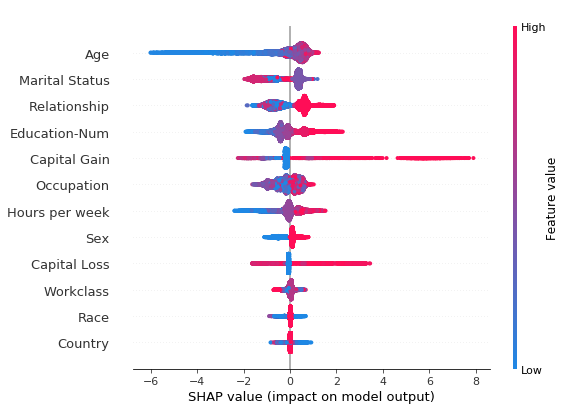

In [34]:
shap.summary_plot(shap_values, X)

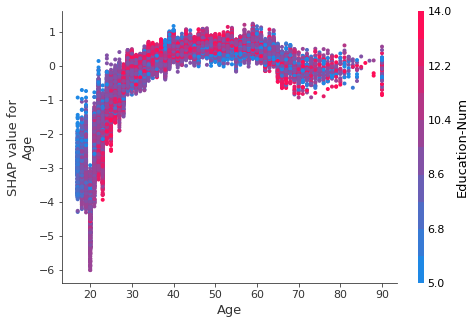

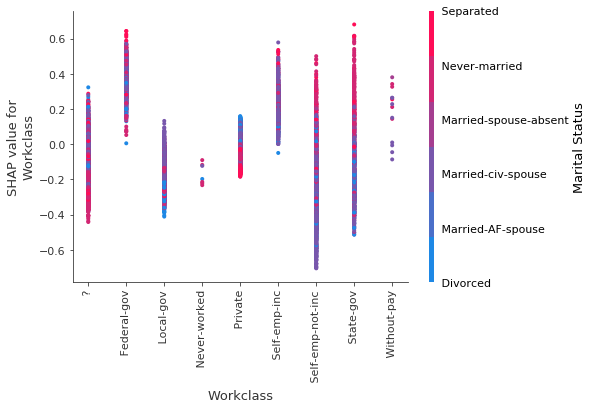

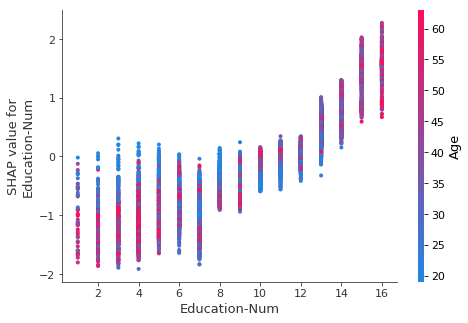

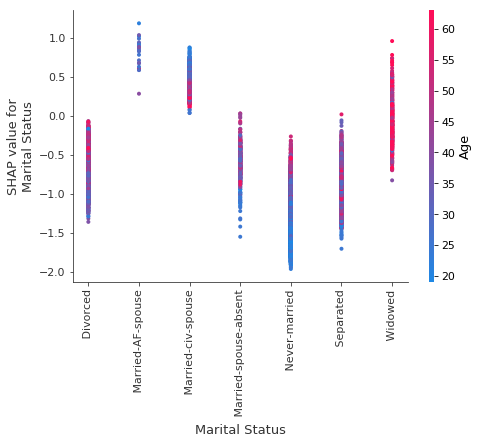

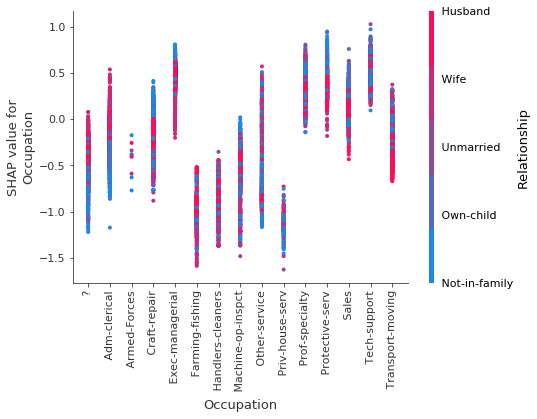

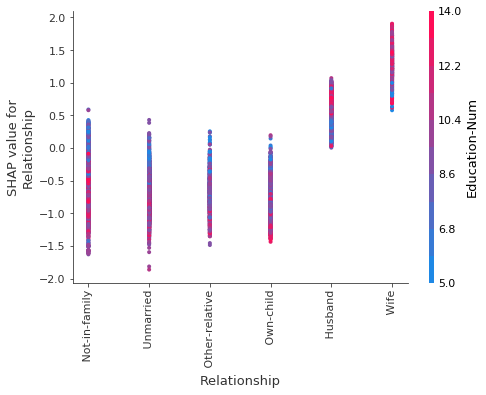

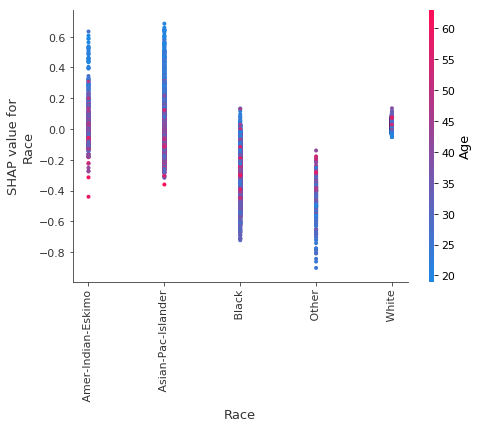

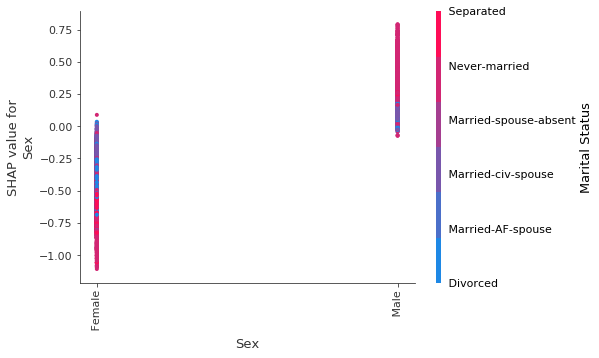

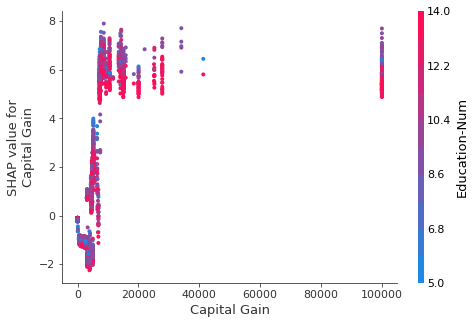

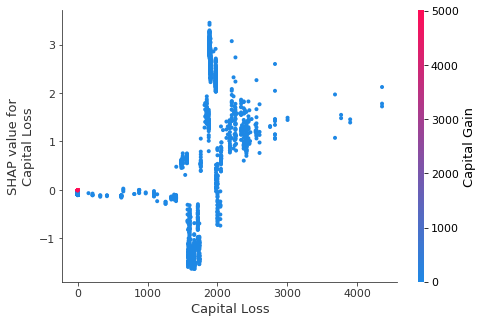

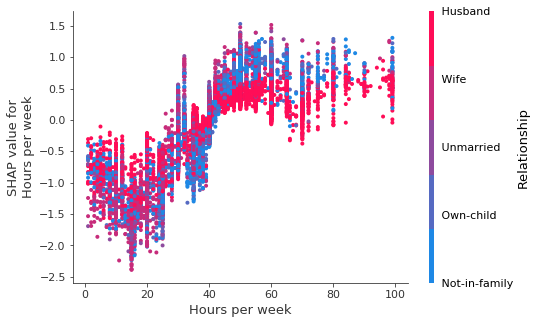

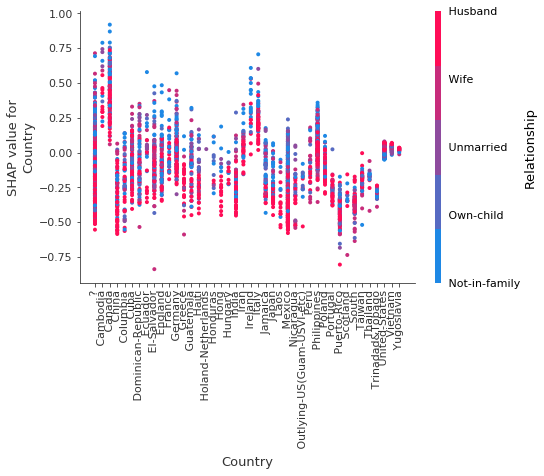

In [35]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X_display)